## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

## Kernels

In [2]:
kernel1 = np.ones((5, 5))
kernel2 = np.array([
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1],
    [ 0,  0,  0,  0,  0],
    [ 1,  1,  1,  1,  1],
    [ 1,  1,  1,  1,  1]
])
kernel3 = np.array([
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1],
    [ 0,  0,  1,  0,  0],
    [ 1,  1,  1,  1,  1],
    [ 1,  1,  1,  1,  1]
])

## Auxillary Functions

In [3]:
def normalize_kernel(kernel):
    kernel_sum = np.sum(kernel)
    if kernel_sum != 0:
        return kernel / kernel_sum
    return kernel

def correlate(image, kernel):
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape
    pad_height, pad_width = kernel_height // 2, kernel_width // 2
    result = np.zeros(
        (image_height - 2 * pad_height,
        image_width - 2 * pad_width)
    )
    for y in range(pad_height, image_height - pad_height):
        for x in range(pad_width, image_width - pad_width):
            window = image[
                y - pad_height:y + pad_height + 1,
                x - pad_width:x + pad_width + 1
            ]
            result[
                y - pad_height, x - pad_width
            ] = np.sum(window * kernel)
    return result

## Normalizing Kernels

In [4]:
kernel1 = normalize_kernel(kernel1)
kernel2 = normalize_kernel(kernel2)
kernel3 = normalize_kernel(kernel3)

## Results

Read images

In [5]:
image1 = np.array(Image.open("boat1.jpg").convert("L"))
image2 = np.array(Image.open("boat2.png").convert("L"))

For kernel 1:

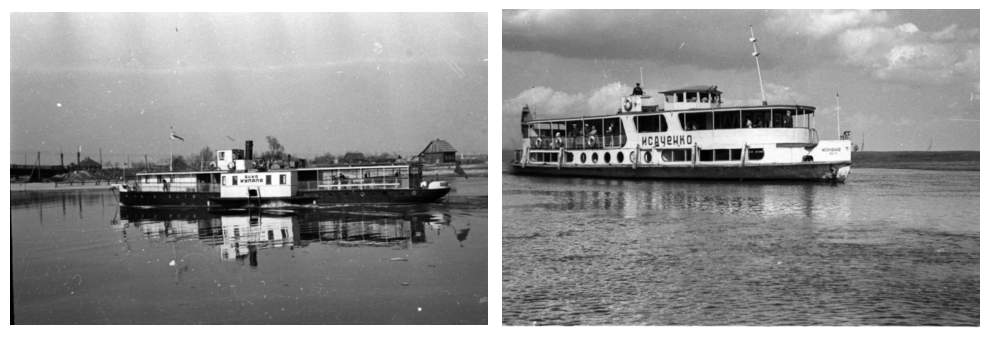

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

result1 = correlate(image1, kernel1)
result2 = correlate(image2, kernel1)
axs[0].imshow(result1, cmap='gray')
axs[0].set_axis_off()
axs[1].imshow(result2, cmap='gray')
axs[1].set_axis_off()

plt.tight_layout();

For kernel 2:

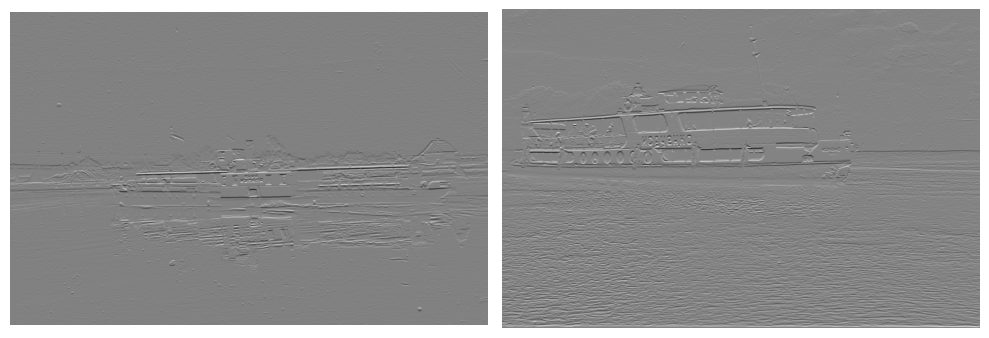

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

result1 = correlate(image1, kernel2)
result2 = correlate(image2, kernel2)
axs[0].imshow(result1, cmap='gray')
axs[0].set_axis_off()
axs[1].imshow(result2, cmap='gray')
axs[1].set_axis_off()

plt.tight_layout();

For kernel 3:

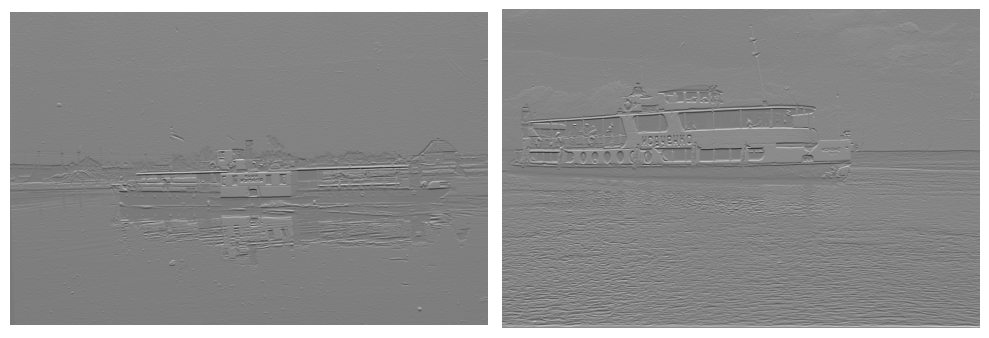

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

result1 = correlate(image1, kernel3)
result2 = correlate(image2, kernel3)
axs[0].imshow(result1, cmap='gray')
axs[0].set_axis_off()
axs[1].imshow(result2, cmap='gray')
axs[1].set_axis_off()

plt.tight_layout();